In [1]:
import os
import pandas as pd
import transformers
from itertools import product
from experiments import run_threshold_experiment, run_supervised_experiment, run_perturbation_experiment
from graphics import plot_llr_hist, plot_roc_curves
from metrics import get_likelihood, get_rank, get_entropy
from perturbations import get_perturbation_stats, perturb_texts_chunked
from preprocessing import prepare_data

DEVICE = "cuda"

DATASET_SIZE = 4_000
N_SAMPLES = 150

IMG_FOLDER = "images"
if not os.path.exists(IMG_FOLDER):
    os.makedirs(IMG_FOLDER)

In [2]:
mask_model = transformers.AutoModelForSeq2SeqLM.from_pretrained("t5-small").to(DEVICE)
mask_tokenizer = transformers.AutoTokenizer.from_pretrained("t5-small")
perturb_fn = lambda texts: perturb_texts_chunked(mask_model, mask_tokenizer, texts, device=DEVICE)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
chosen_datasets = [
    ("xsum", "document"),
    ("squad", "context"),
]

base_models = [
    ("gpt2-medium", "gpt2-medium"),
    ("facebook/opt-2.7b", "opt-2.7b"),
]

Running new experiment... Dataset: xsum, Model: gpt2-medium


Token indices sequence length is longer than the specified maximum sequence length for this model (700 > 512). Running this sequence through the model will result in indexing errors
Computing xsum_gpt2-medium_likelihood: 100%|██████████| 3/3 [00:15<00:00,  5.22s/it]


ROC AUC: 0.9354666666666667, PR AUC: 0.8921794005605268


Computing xsum_gpt2-medium_rank: 100%|██████████| 3/3 [00:18<00:00,  6.13s/it]


ROC AUC: 0.8442222222222222, PR AUC: 0.8679953920539857


Computing xsum_gpt2-medium_logrank: 100%|██████████| 3/3 [00:18<00:00,  6.17s/it]


ROC AUC: 0.9613333333333334, PR AUC: 0.9263252759948166


Computing xsum_gpt2-medium_entropy: 100%|██████████| 3/3 [00:15<00:00,  5.17s/it]
Some weights of the model checkpoint at roberta-base-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


ROC AUC: 0.5936444444444444, PR AUC: 0.5942003145129817


Evaluating sampled: 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]


ROC AUC: 0.9893777777777778, PR AUC: 0.9840380061268937


Some weights of the model checkpoint at roberta-large-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Evaluating sampled: 100%|██████████| 3/3 [00:05<00:00,  1.71s/it]


ROC AUC: 0.9998666666666666, PR AUC: 0.9998662152485389


Computing perturbation stats: 100%|██████████| 150/150 [02:23<00:00,  1.04it/s]


ROC AUC: 0.6791555555555556, PR AUC: 0.6441453710961885


<Figure size 640x480 with 0 Axes>

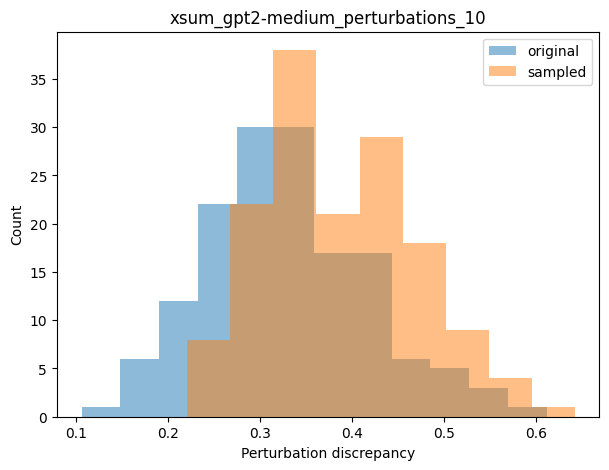

xsum_gpt2-medium_likelihood_threshold roc_auc: 0.935
xsum_gpt2-medium_rank_threshold roc_auc: 0.844
xsum_gpt2-medium_logrank_threshold roc_auc: 0.961
xsum_gpt2-medium_entropy_threshold roc_auc: 0.594
xsum_gpt2-medium_roberta-base-openai-detector_supervised roc_auc: 0.989
xsum_gpt2-medium_roberta-large-openai-detector_supervised roc_auc: 1.000
xsum_gpt2-medium_perturbations_10_perturbations roc_auc: 0.679


<Figure size 640x480 with 0 Axes>

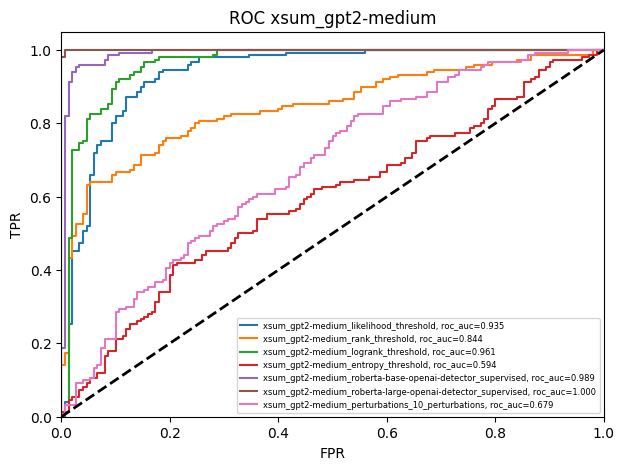

Running new experiment... Dataset: squad, Model: gpt2-medium


Token indices sequence length is longer than the specified maximum sequence length for this model (597 > 512). Running this sequence through the model will result in indexing errors
Computing squad_gpt2-medium_likelihood: 100%|██████████| 3/3 [00:16<00:00,  5.49s/it]


ROC AUC: 0.9678666666666667, PR AUC: 0.964788504319893


Computing squad_gpt2-medium_rank: 100%|██████████| 3/3 [00:19<00:00,  6.38s/it]


ROC AUC: 0.8850222222222223, PR AUC: 0.9065220640156089


Computing squad_gpt2-medium_logrank: 100%|██████████| 3/3 [00:18<00:00,  6.33s/it]


ROC AUC: 0.9903111111111111, PR AUC: 0.9895230172252141


Computing squad_gpt2-medium_entropy: 100%|██████████| 3/3 [00:16<00:00,  5.52s/it]


ROC AUC: 0.5365333333333334, PR AUC: 0.5062893846589132


Some weights of the model checkpoint at roberta-base-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Evaluating sampled: 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]


ROC AUC: 0.9897999999999999, PR AUC: 0.9902550981858416


Some weights of the model checkpoint at roberta-large-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Evaluating sampled: 100%|██████████| 3/3 [00:05<00:00,  1.73s/it]


ROC AUC: 0.9987555555555556, PR AUC: 0.9987276630332678


Computing perturbation stats: 100%|██████████| 150/150 [02:28<00:00,  1.01it/s]

ROC AUC: 0.7728, PR AUC: 0.7721402140371687


<Figure size 640x480 with 0 Axes>

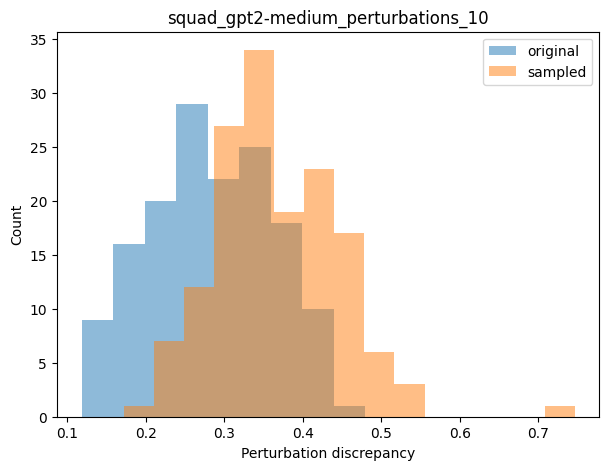

squad_gpt2-medium_likelihood_threshold roc_auc: 0.968
squad_gpt2-medium_rank_threshold roc_auc: 0.885
squad_gpt2-medium_logrank_threshold roc_auc: 0.990
squad_gpt2-medium_entropy_threshold roc_auc: 0.537
squad_gpt2-medium_roberta-base-openai-detector_supervised roc_auc: 0.990
squad_gpt2-medium_roberta-large-openai-detector_supervised roc_auc: 0.999
squad_gpt2-medium_perturbations_10_perturbations roc_auc: 0.773


<Figure size 640x480 with 0 Axes>

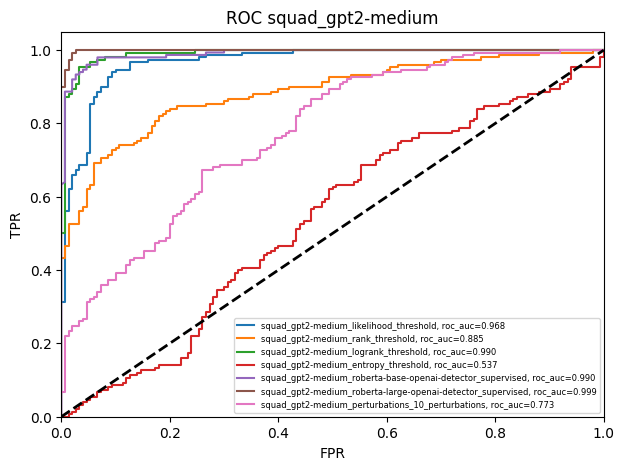

config.json:   0%|          | 0.00/691 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/5.30G [00:00<?, ?B/s]

In [ ]:
all_experiments = []
for base_model_path, base_model_name in base_models:
    base_model = transformers.AutoModelForCausalLM.from_pretrained(base_model_path).to(DEVICE)
    base_tokenizer = transformers.AutoTokenizer.from_pretrained(base_model_path)
    base_tokenizer.pad_token_id = base_tokenizer.eos_token_id

    ll_fn = lambda text: get_likelihood(base_model, base_tokenizer, text, DEVICE)
    rank_fn = lambda text: -get_rank(base_model, base_tokenizer, text, DEVICE, log=False)
    logrank_fn = lambda text: -get_rank(base_model, base_tokenizer, text, DEVICE, log=True)
    entropy_fn = lambda text: get_entropy(base_model, base_tokenizer, text, DEVICE)

    for dataset_name, dataset_col in chosen_datasets:
        print("============================================================================")
        print(f"Running new experiment... Dataset: {dataset_name}, Model: {base_model_name}")
        print("============================================================================")
        data = prepare_data(dataset_name, dataset_col, base_model, base_tokenizer, device=DEVICE, dataset_size=DATASET_SIZE, n_samples=N_SAMPLES)

        exp_name = f"{dataset_name}_{base_model_name}"
        experiments = []

        experiments.append(run_threshold_experiment(ll_fn, f"{exp_name}_likelihood", data, n_samples=N_SAMPLES))
        experiments.append(run_threshold_experiment(rank_fn, f"{exp_name}_rank", data, n_samples=N_SAMPLES))
        experiments.append(run_threshold_experiment(logrank_fn, f"{exp_name}_logrank", data, n_samples=N_SAMPLES))
        experiments.append(run_threshold_experiment(entropy_fn, f"{exp_name}_entropy", data, n_samples=N_SAMPLES))
        experiments.append(run_supervised_experiment("roberta-base-openai-detector", data, exp_name, device=DEVICE, n_samples=N_SAMPLES))
        experiments.append(run_supervised_experiment("roberta-large-openai-detector", data, exp_name, device=DEVICE, n_samples=N_SAMPLES))

        for n_perturbations in (10,):
            perturbation_stats = get_perturbation_stats(perturb_fn, ll_fn, data, n_perturbations=n_perturbations)
            experiments.append(run_perturbation_experiment(perturbation_stats, f"{exp_name}_perturbations_{n_perturbations}"))
            plot_llr_hist(perturbation_stats, name=f"{exp_name}_perturbations_{n_perturbations}", img_folder=IMG_FOLDER)

        plot_roc_curves(experiments, name=exp_name, img_folder=IMG_FOLDER)
        all_experiments += experiments

In [ ]:
res = {"model": [], "dataset": [], "n_perturbations": [], "roc_auc": []}
for exp in all_experiments:
    if "perturbations" in exp["name"]:
        dataset, model, _, n_perturbations = exp["name"].split("_")
        res["model"].append(model)
        res["dataset"].append(dataset)
        res["n_perturbations"].append(n_perturbations)
        res["roc_auc"] = exp["roc_auc"]
df = pd.DataFrame(res)
df.head(48)

In [ ]:
df.to_excel("results.xlsx", index=False)